<h1>
<font color="#ff2e2e">
Corner Detection
</font>
</h1>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete the harris_points function without using OpenCV functions </font></h3>

In [8]:
def harris_points(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''    
    result = np.dot(image[...,:3], [0.299,0.587,0.114])
    sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    window_size = (16,16) # I made it bigger so that noisy corners not be detected, this helped in detecting just one point as a corner around a corner
    pad_size = (window_size[0]//2, window_size[1]//2)
    result = np.pad(result, ((pad_size[0], pad_size[0]),(pad_size[1], pad_size[1])), mode='reflect')
    result_x = convolve(result, sobel_x, mode="valid")
    result_y = convolve(result, sobel_y, mode="valid")
    print(result.shape)
    print(result_x.shape)
    result_x2 = result_x*result_x
    result_y2 = result_y*result_y
    result_xy = result_x*result_y
    final_result = np.zeros_like(result_x2, dtype=np.float64)
    for i in range(pad_size[0], image.shape[0]-pad_size[0]):
        for j in range(pad_size[1], image.shape[1]-pad_size[1]):
            # we could apply a gaussian window here
            element_1 = np.sum(result_x2[i-pad_size[0]:i+pad_size[0], j-pad_size[1]:j+pad_size[1]])
            element_23 = np.sum(result_xy[i-pad_size[0]:i+pad_size[0], j-pad_size[1]:j+pad_size[1]])
            element_4 = np.sum(result_y2[i-pad_size[0]:i+pad_size[0], j-pad_size[1]:j+pad_size[1]])
            det = element_1*element_4 - element_23*element_23
            k = 0.05 # this number is usually between 0.04 and 0.06
            trace2 = (element_1 + element_4) ** 2
            response = det - k*trace2
            final_result[i][j] = response
    # NMS (Non-Minimum Suppression)
    NMS_window_size = (24,24) # I changed it multiple times because multiple points were detected as a corner but just one
    kx, ky = NMS_window_size[0]//2, NMS_window_size[1]//2
    for i in range(kx, final_result.shape[0]-kx):
        for j in range(ky, final_result.shape[1]-ky):
            maximum = np.max(final_result[i-kx:i+kx, j-ky:j+ky])
            if final_result[i,j] < maximum:
                final_result[i,j] = 0
    ret, final_result = cv2.threshold(final_result, np.max(final_result)//10, 255, cv2.THRESH_BINARY)
    final_result = cv2.dilate(final_result, np.ones((8,8)))
    return final_result, result_x, result_y, result_xy

<h3><font color = "#079e05"> Show the result </font></h3>

(963, 1015)
(961, 1013)


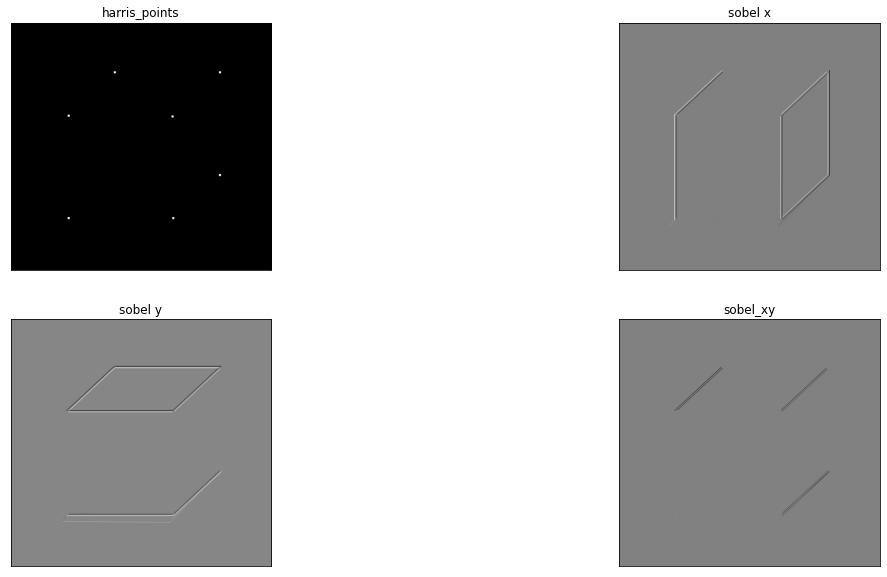

In [10]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
# image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
points, result_x, result_y, result_xy = harris_points(image)
image_list.append([points, 'harris_points', 'img'])
image_list.append([result_x, 'sobel x', 'img'])
image_list.append([result_y, 'sobel y', 'img'])
image_list.append([result_xy, 'sobel_xy', 'img'])
plotter(image_list,2 , 2, True, 20, 10, '7')

<h3><font color = "#079e05"> Complete the harris_points_OpenCV function with using OpenCV functions </font></h3>

In [81]:
def harris_points_OpenCV(image):
    '''
    Gets corner points by applying the harris detection algorithm.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''  
    result = np.dot(image[...,:3], [0.299,0.587,0.114])
    result = np.float32(result)
    result = cv2.cornerHarris(result, 15, 5, 0.05)
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

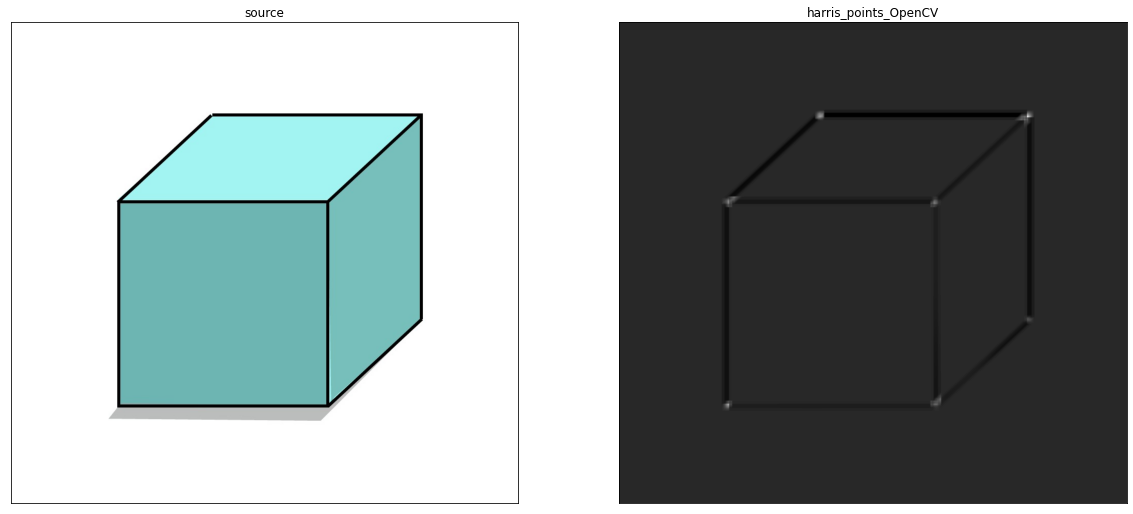

In [82]:
image_list = []
image = cv2.imread(os.path.join('images/Q5', 'harris.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([harris_points_OpenCV(image), 'harris_points_OpenCV', 'img'])
plotter(image_list,1 , 2, True, 20, 10, '7')